In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd

df = pd.read_excel(r"C:\Users\godaw\Downloads\Call_Center.xlsx")


In [7]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0


In [11]:
df.head

<bound method NDFrame.head of      Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0     ID0001    Diane  2021-01-01  09:12:58   Contract related              Y   
1     ID0002    Becky  2021-01-01  09:12:58  Technical Support              Y   
2     ID0003  Stewart  2021-01-01  09:47:31   Contract related              Y   
3     ID0004     Greg  2021-01-01  09:47:31   Contract related              Y   
4     ID0005    Becky  2021-01-01  10:00:29    Payment related              Y   
...      ...      ...         ...       ...                ...            ...   
4995  ID4996      Jim  2021-03-31  16:37:55    Payment related              Y   
4996  ID4997    Diane  2021-03-31  16:45:07    Payment related              Y   
4997  ID4998    Diane  2021-03-31  16:53:46    Payment related              Y   
4998  ID4999      Jim  2021-03-31  17:02:24          Streaming              Y   
4999  ID5000    Diane  2021-03-31  17:39:50   Contract related              N  

In [12]:
df.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [15]:
df.isnull().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Call Id                       0
Agent                         0
Date                          0
Time                          0
Topic                         0
Answered (Y/N)                0
Resolved                      0
Speed of answer in seconds    0
AvgTalkDuration               0
Satisfaction rating           0
dtype: int64

In [18]:
len(df)

4054

In [19]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

In [20]:
df.duplicated().sum()

0

In [22]:
answered_count = df[df["Answered (Y/N)"] == "Y"].shape[0]
print("Total Answered Calls:", answered_count)


Total Answered Calls: 4054


In [ ]:
insight:
this calculation shows how many calls were successfully answered from all call records.


In [23]:
answered_count

4054

In [24]:
resolved_count = df[df["Resolved"] == "Y"].shape[0]
print("Total Resolved Calls:", resolved_count)


Total Resolved Calls: 3646


In [ ]:
insight:
the number of calls successfully resolved is calculated by filtering the dataset where the "Resolved" column is marked as
"Y". This gives an accurate count of all resolved calls.



In [25]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

# Total Calls Handled per Agent

In [ ]:
How many calls did each agent handle?


Agent
Jim        536
Dan        523
Becky      517
Martha     514
Greg       502
Diane      501
Joe        484
Stewart    477
Name: count, dtype: int64


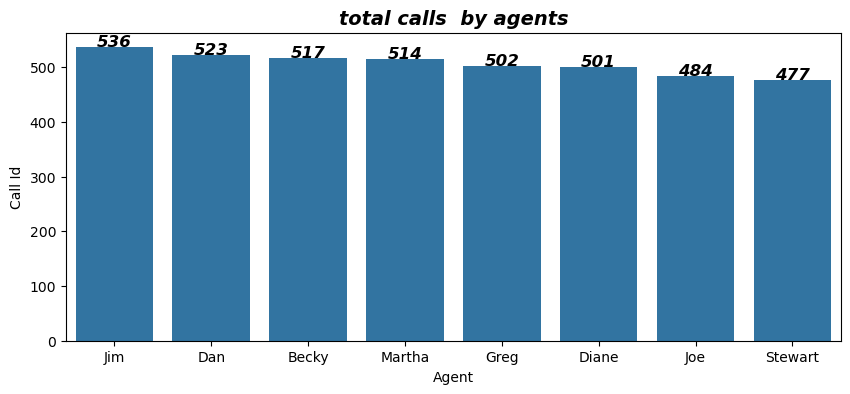

In [88]:
call_by_agents = df['Agent'].value_counts()
print(call_by_agent)

plt.figure(figsize=(10,4))
sns.barplot(x = call_by_agents.index, y = call_by_agents)
plt.title("total calls  by agents", color = 'black', fontsize=14, fontweight='bold', fontstyle='italic')
plt.xlabel("Agent")
plt.ylabel("Call Id")

for i, value in enumerate(call_by_agents.values):
    plt.text(i, value + 1,               # position (x, y)
             str(value),                # text to show
             ha='center',
             fontweight='bold',
             fontstyle='italic',
             color='black',
             fontsize=12)
plt.show()

In [ ]:
insight:
the bar chart visualizes the number of calls handled by each agent. This allows us to assess individual agent performance and
identify workload distribution. The text labels on the bars show the exact number of calls handled by each agent, 
making the data easy to interpret.

# Answered vs Not Answered Ratio

In [ ]:
What is the overall ratio of answered vs not answered calls?


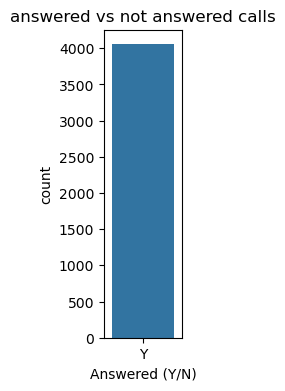

In [37]:
plt.figure(figsize=(1,4))
sns.countplot(data=df, x = "Answered (Y/N)")
plt.title("answered vs not answered calls")
plt.show()
              

In [ ]:
insight:
the count plot visualizes the number of calls that were answered ("Y") versus those that were not answered ("N").
This gives a clear comparison of call resolution status, helping to identify areas for improving call response rates.



# Average Speed of Answer by Agent

Agent
Joe        70.99
Martha     69.49
Greg       68.44
Dan        67.28
Jim        66.34
Diane      66.27
Stewart    66.18
Becky      65.33
Name: Speed of answer in seconds, dtype: float64


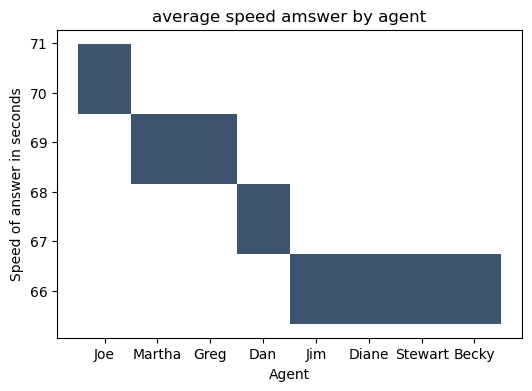

In [49]:
avg_speed = df.groupby('Agent')['Speed of answer in seconds'].mean().sort_values(ascending=False).round(2)
print(avg_speed)

plt.figure(figsize=(6,4))
sns.histplot(x= avg_speed.index, y = avg_speed)
plt.title("average speed amswer by agent")
plt.xlabel("Agent")
plt.ylabel("Speed of answer in seconds")
plt.show()

In [ ]:
insight:
the bar chart represents the average speed of answer by each agent, calculated by grouping the dataset by "Agent" 
and averaging the "Speed of answer in seconds". The chart helps to evaluate the efficiency of agents in answering calls, with a
lower speed indicating faster response times.

# Trend of Calls over Time

In [ ]:
Are calls increasing daily?

In [50]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

<Axes: title={'center': 'call valume trend'}, xlabel='Date'>

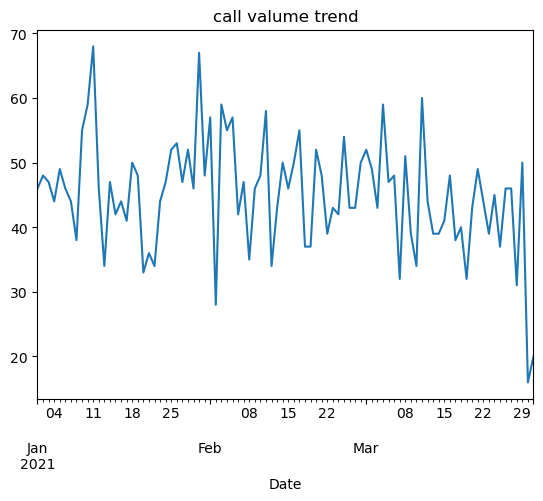

In [55]:
df['Date'] = pd.to_datetime(df['Date'])
calls_by_date = df['Date'].value_counts().sort_index()

calls_by_date.plot(kind='line',title='call valume trend')


In [ ]:
insight:
the line chart illustrates the trend of call volumes over time, based on the "Date" column. By visualizing the frequency of 
calls per date, this chart enables us to identify peak times and periods 
of high or low call activity.

# Most Common Topics

In [58]:
topic_count = df['Topic'].value_counts()
print(topic_count)

Topic
Streaming            847
Payment related      818
Technical Support    805
Admin Support        795
Contract related     789
Name: count, dtype: int64


In [ ]:
insight:
the value counts of the "Topic" column reveal the distribution of call topics in the dataset. This analysis helps in identifying
recurring issues or concerns, allowing for targeted improvements or resource allocation based
on the most frequent topics

In [59]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

# satisfaction Rating by Agent

Agent
Martha     3.47
Dan        3.45
Diane      3.41
Greg       3.40
Stewart    3.40
Jim        3.39
Becky      3.37
Joe        3.33
Name: Satisfaction rating, dtype: float64


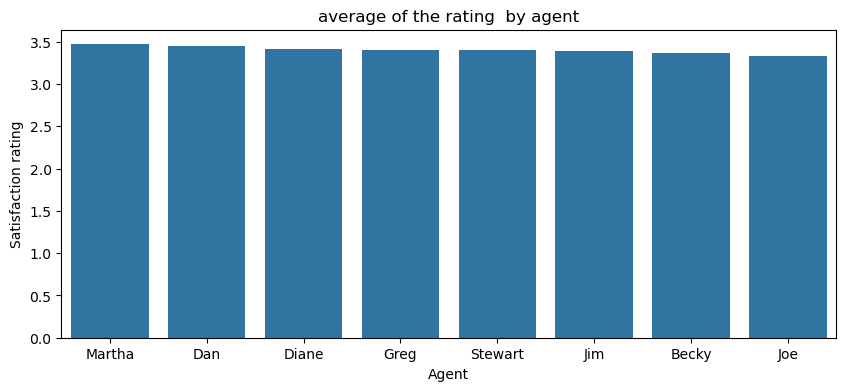

In [65]:
satisfy_agent = df.groupby('Agent')['Satisfaction rating'].mean().sort_values(ascending=False).round(2)
print(satisfy_agent)

plt.figure(figsize=(10,4))
sns.barplot(x= satisfy_agent.index, y = satisfy_agent)
plt.title("average of the rating  by agent")
plt.xlabel("Agent")
plt.ylabel('Satisfaction rating')
plt.show()

In [ ]:
insight:
the bar chart visualizes the average satisfaction ratings for each agent, calculated by grouping the dataset by "Agent" 
and averaging the "Satisfaction rating". This analysis enables us to evaluate agent performance,
identifying high-performing agents who consistently 
receive better ratings.

# Calls Resolved vs Not Resolved

In [66]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

Text(0.5, 1.0, 'resolved vs not resolved')

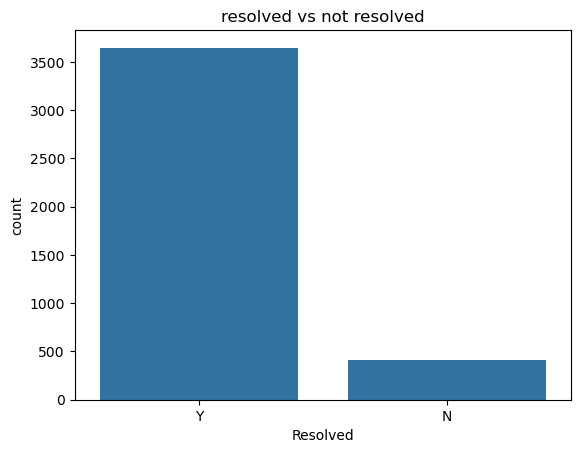

In [67]:
sns.countplot(data=df, x= 'Resolved')
plt.title("resolved vs not resolved")

In [ ]:
insight:
the count plot shows the distribution of resolved and unresolved calls, highlighting the resolution rate within the dataset.
A higher count of resolved calls suggests an efficient resolution process, whereas unresolved calls might indicate areas needing improvement.



# Average Talk Duration per Topic

<Axes: xlabel='Resolved', ylabel='Agent'>

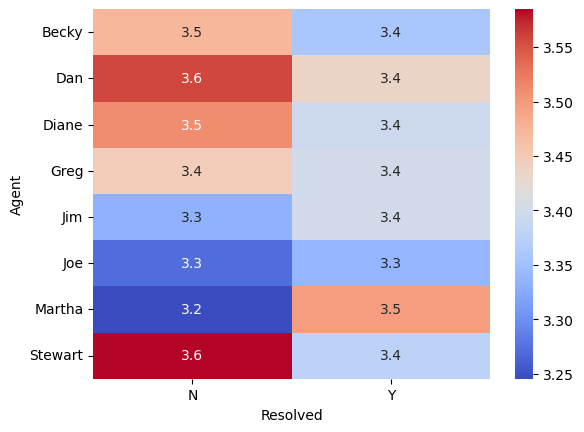

In [76]:
pivot = df.pivot_table(values='Satisfaction rating', index='Agent', columns='Resolved', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap = 'coolwarm')

In [ ]:
insight:
the heatmap represents the average satisfaction ratings for each agent, segmented by the resolution status of calls
(resolved or not). By visualizing these ratings, it helps to understand the relationship between call resolution and customer satisfaction,
highlighting how effective agents are in delivering satisfactory outcomes foresolved vs. unresolved calls.

In [ ]:
Conclusion:

The heatmap illustrates that agents tend to achieve higher customer satisfaction ratings on resolved calls compared to
unresolved calls, which suggests that effective resolution directly correlates with increased customer satisfaction.

Agents with consistently lower satisfaction ratings for unresolved calls may require additional training or process optimization to
enhance their problem-solving skills and customer interaction techniques.

Furthermore, the heatmap enables the identification of agents who consistently perform well across both resolved and unresolved call categories.
These agents can be recognized as top performers, and their approaches can serve as best practices for others.

Overall, the data emphasizes the importance of call resolution in driving customer satisfaction and highlights areas for improvement in agent performance.

